### 1.

In [1]:
import pandas as pd

dataset = pd.read_csv('heart.csv')

### 2.

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.

In [4]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, max_samples='auto',
                            contamination=float(0.1), max_features=1.0)
iso_forest.fit(dataset)

IsolationForest(contamination=0.1)

In [5]:
dataset['anomaly'] = iso_forest.predict(dataset)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,anomaly
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,-1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [6]:
#Dupa aplicarea IsolationForest numarul de coloane a scazut la 272
dataset = dataset[dataset.anomaly != -1]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       272 non-null    int64  
 1   sex       272 non-null    int64  
 2   cp        272 non-null    int64  
 3   trestbps  272 non-null    int64  
 4   chol      272 non-null    int64  
 5   fbs       272 non-null    int64  
 6   restecg   272 non-null    int64  
 7   thalach   272 non-null    int64  
 8   exang     272 non-null    int64  
 9   oldpeak   272 non-null    float64
 10  slope     272 non-null    int64  
 11  ca        272 non-null    int64  
 12  thal      272 non-null    int64  
 13  target    272 non-null    int64  
 14  anomaly   272 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 34.0 KB


### 4. & 5.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier

from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
X = dataset.drop(['target', 'anomaly'], 1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [10]:
logistic = make_pipeline(scaler, LogisticRegression())

rand_forest = make_pipeline(scaler, RandomForestClassifier())

svc = make_pipeline(scaler, SVC())

xg = make_pipeline(scaler, XGBRFClassifier())

In [11]:
logistic_cross = cross_val_score(logistic, X_train, y_train)

In [12]:
cross_val_score(rand_forest, X_train, y_train)

array([0.85365854, 0.87804878, 0.73170732, 0.82926829, 0.825     ])

In [13]:
cross_val_score(svc, X_train, y_train)

array([0.87804878, 0.82926829, 0.7804878 , 0.82926829, 0.8       ])

In [14]:
cross_val_score(xg, X_train, y_train)

array([0.87804878, 0.87804878, 0.82926829, 0.82926829, 0.875     ])

In [15]:
logistic.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)
xg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbrfclassifier',
                 XGBRFClassifier(base_score=0.5, booster='gbtree',
                                 colsample_bylevel=1, colsample_bytree=1,
                                 gamma=0, gpu_id=-1, importance_type='gain',
                                 interaction_constraints='', max_delta_step=0,
                                 max_depth=6, min_child_weight=1, missing=nan,
                                 monotone_constraints='()', n_estimators=100,
                                 n_jobs=0, num_parallel_tree=100,
                                 objective='binary:logistic', random_state=0,
                                 reg_alpha=0, scale_pos_weight=1,
                                 tree_method='exact', validate_parameters=1,
                                 verbosity=None))])

### 6.

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

0.8529411764705882


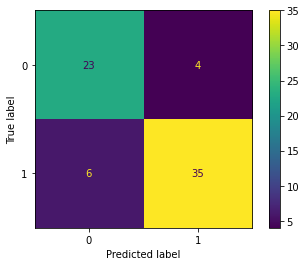

In [17]:
print(accuracy_score(y_test, logistic.predict(X_test)))
plot_confusion_matrix(logistic, X_test, y_test)

0.8382352941176471


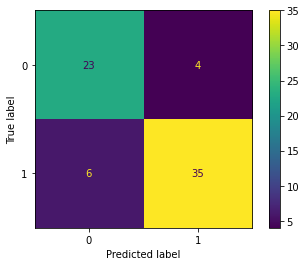

In [18]:
print(accuracy_score(y_test, rand_forest.predict(X_test)))
plot_confusion_matrix(logistic, X_test, y_test)

0.8823529411764706


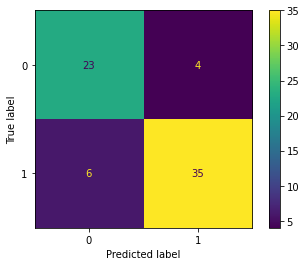

In [19]:
print(accuracy_score(y_test, svc.predict(X_test)))
plot_confusion_matrix(logistic, X_test, y_test)

0.8529411764705882


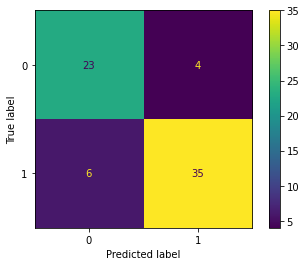

In [20]:
print(accuracy_score(y_test, xg.predict(X_test)))
plot_confusion_matrix(logistic, X_test, y_test)

#### Din cele 4 modele pe care le-am antrenat, acuratetea cea mai mare a avut-o SVC, pentru a urca acuratetea ne va trebuie mai multe date